# DesicionTreeClassifier

Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import weight_height_fetcher
from sklearn.metrics import f1_score
from decision_tree_np import DecisionTreeClassifier as CustomDecisionTreeNp
import decision_tree_visualizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

In [4]:
features_train, features_valid, target_train, target_valid = weight_height_fetcher.get_splitted_data(nsamples=1000)
weight_height_fetcher.data

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [66]:
color_classes = {0: 'blue', 1: 'red'}
label_classes = {0: 'Male', 1: 'Female'}
label_features = {0: 'height', 1: 'weight'}

def visualize_tree(model):
    return decision_tree_visualizer.visualize_result(model.root_node, color_classes, label_classes, label_features, save_pdf=False)


def test_model(model):
    predicted_train = model.predict(features_train)
    predicted = model.predict(features_valid)
    print(f'train score = {f1_score(target_train.values, predicted_train):.3f}, valid score f1 = {f1_score(target_valid.values, predicted):.3f}, depth {model.get_depth()}, name {model.__class__.__name__}')

train score = 0.927, valid score f1 = 0.932, depth 9, name DecisionTreeClassifier
Wall time: 20 ms


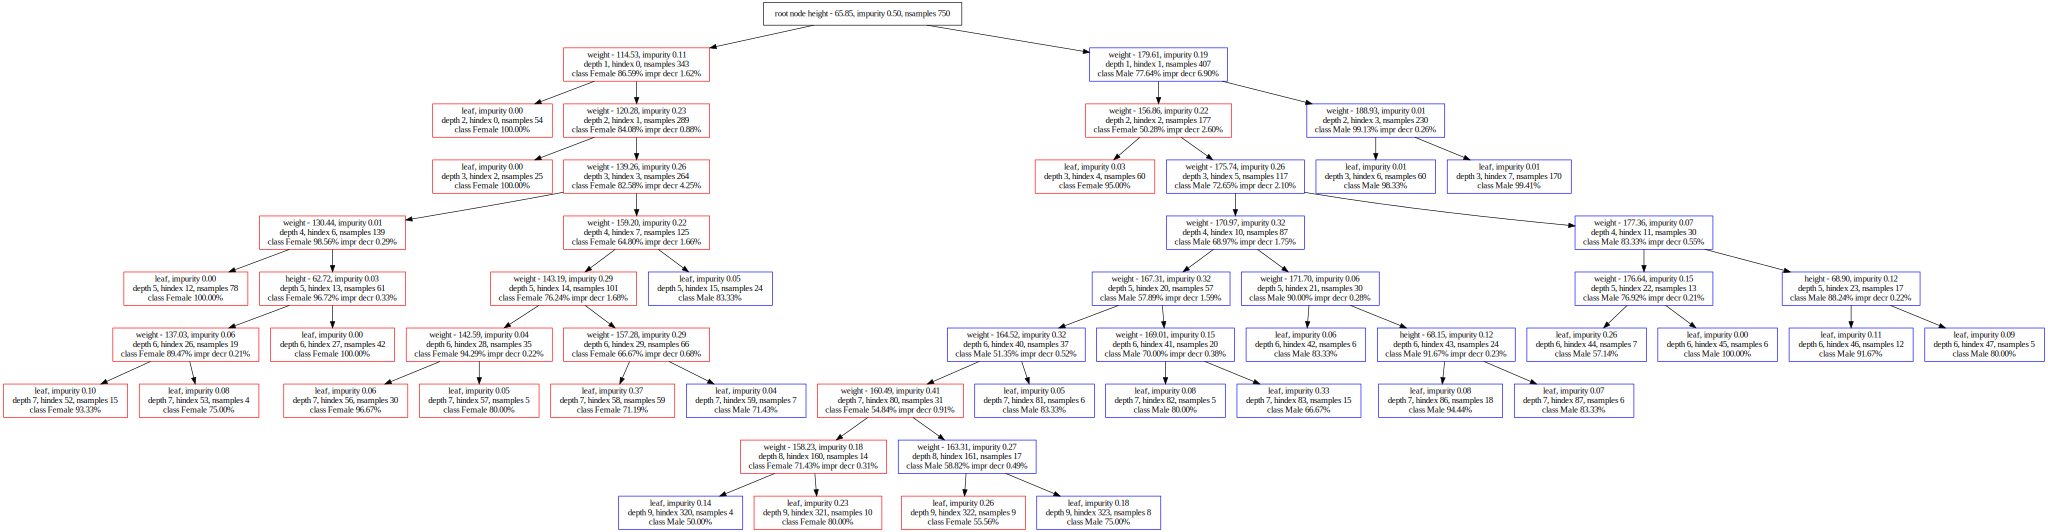

In [67]:
%%time
model = CustomDecisionTreeNp(max_depth=10, debug=False, criterion='gini', random_state=1, splitter='random', min_impurity_decrease=0.002, min_samples_split=10, min_samples_leaf=4)
model.fit(features_train, target_train)
test_model(model)
visualize_tree(model)

# RandomForestClassifier

In [62]:
from random_forest import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, max_depth=10, splitter='random', random_state=1, min_impurity_decrease=0, min_samples_split=10, min_samples_leaf=4)

model.fit(features_train, target_train)
test_model(model)

train score = 0.917, valid score f1 = 0.908, depth 10


## Validate sklearn implementations

In [70]:
%%time

model = DecisionTreeClassifier(max_depth=None, splitter='random', random_state=1, min_impurity_decrease=0.005, min_samples_split=10, min_samples_leaf=4)
model.fit(features_train, target_train)

test_model(model)

model = RandomForestClassifier(n_estimators=10, max_depth=10, splitter='random', random_state=1, min_impurity_decrease=0.005, min_samples_split=10, min_samples_leaf=4)
model.fit(features_train, target_train)

test_model(model)

dummy_classifier = DummyClassifier(random_state=1)
dummy_classifier.fit(features_train, target_train)
print(f'dummy score {f1_score(target_valid, dummy_classifier.predict(features_valid)):0.3f}')

train score = 0.923, valid score f1 = 0.925, depth 6, name DecisionTreeClassifier
train score = 0.906, valid score f1 = 0.908, depth 9, name RandomForestClassifier
dummy score 0.502
Wall time: 102 ms
